# Covid 19: Genome analysis with Biopython
### Fetch COVID 19 genome from NCBI
id: **MN908947** COVID 19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the central hospital of wuhan on 26 December 2019.
 

In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 7.8 MB/s 


In [2]:
#to obtain the data from database
from Bio import Entrez, SeqIO
Entrez.email = 'alejandro.delgado@yachaytech.edu.ec'
handle = Entrez.efetch(db='nucleotide',id='MN908947', rettype='gb', retmode='text')
recs = list(SeqIO.parse(handle,'gb'))
handle.close()

In [3]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [4]:
covid_dna = recs[0].seq
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [5]:
print(f'The genome of COVID-19 consist of {len(covid_dna)} nucleotides')

The genome of COVID-19 consist of 29903 nucleotides


In [6]:
#we can calculate molecular weigth
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [7]:
#gc content- higher GC content indicates more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097148

#### Nucleotide distribution in COVID-19 genome

In [8]:
count_nucleotide = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [9]:
count_nucleotide

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

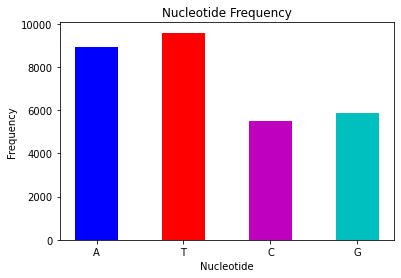

In [11]:
import matplotlib.pyplot as plt
width=0.5
plt.bar(count_nucleotide.keys(), count_nucleotide.values(), width, color=['b','r','m','c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

## Discussion
1. The frequency of nucleotudes A and T is higher than the frequency of C and G
2. So... How do we extract more information from this long sequency of letter?
3. By gene expression: process by which genetic information from a gene is used in the syntheis of functional gene products.These products can be proteins.

#### Transcription and translation
1. Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.
2. Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

In [12]:
covid_mrna = covid_dna.transcribe() #transcription
covid_aa = covid_mrna.translate() #translation 

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [13]:
# most common amino acids
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

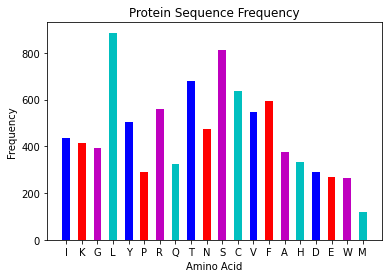

In [14]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color = ['b','r','m','c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [15]:
print(f'COVID-19 genome has {sum(common_amino.values())} amino acids')

COVID-19 genome has 9193 amino acids


With the split function we can separate the sequences at any stop codon and keeps the amino acids chains separated. This make easier for further analysis.

In [17]:
proteins = covid_aa.split('*')
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [18]:
print(f'we have {len(proteins)} amino acids in the covid-19 genome')

we have 775 amino acids in the covid-19 genome


###### **NOTE**
It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the **chains with more than 20 amino acid** chains: Proteins.

In [19]:
for protein in proteins:
  if len(protein)<20:
    proteins.remove(protein)

In [20]:
print(f'Then we have {len(proteins)} proteins, with more than 20 amino acids in the covid-19 genome ')

Then we have 409 proteins, with more than 20 amino acids in the covid-19 genome 


In [23]:
top_5_proteins = sorted(proteins, key = len) #order the protein ascending by len
top_5_proteins[-1]  # give me the largest protein

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [24]:
len(top_5_proteins[-1])

2701

Save this protein for further analysis

In [25]:
with open('protein_seq.fasta', 'w') as file:
  file.write(f'>covid protein\n{top_5_proteins[-1]}')

# Conclusions:
* Sequence length: 29,903 base pairs
* GC content: 37.97%
* Higher amount of Leucine and Serine
* 409 proteins with more than 20 amino acids
* The largest protein is of length of 2701 amino acid